In [1]:
## Importing all the necessary librarires

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split , RandomizedSearchCV , cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
# Step 1: Load the dataset
df = pd.read_csv("C:/Users/vanya/OneDrive/Desktop/VANYA/Clg_Project/diabetes_prediction_dataset.csv")

In [3]:
# Step 2: Explore the data
print("First 5 rows:\n", df.head())
print("\nDataset Info:\n")
print(df.info())
print("\nMissing values:\n", df.isnull().sum())


First 5 rows:
    gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  

In [4]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
# Step 3: Encode categorical columns
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['smoking_history'] = label_encoder.fit_transform(df['smoking_history'])
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,90,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,4,35.42,4.0,100,0


In [7]:
# Step 4: Features and Target
X = np.asarray(df.drop(['diabetes'] , axis=1))
y = np.asarray(df['diabetes'])
X_norm = StandardScaler().fit(X).transform(X)

In [8]:
scaler = StandardScaler()

In [9]:
# Step 5: Train-test split
X_train , X_test , y_train , y_test = train_test_split(X_norm , y , test_size=0.2 , random_state=42 , stratify=y)

In [10]:
# Step 6 : Model Training 
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(
        random_state=42,
        solver="liblinear",   
        max_iter=500
    )
}

In [11]:
cv_scores = {}

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    cv_scores[name] = scores
    print(name, "Average Accuracy:", round(np.mean(scores), 4))


Decision Tree Average Accuracy: 0.9501
Logistic Regression Average Accuracy: 0.96


In [12]:
cv_scores

{'Decision Tree': array([0.9524375, 0.9493125, 0.95125  , 0.948875 , 0.9488125]),
 'Logistic Regression': array([0.96025 , 0.961625, 0.96025 , 0.95925 , 0.958875])}

In [13]:
#Model Selection 
decision_tree = DecisionTreeClassifier(random_state=42)
logistic_regression = LogisticRegression(
        random_state=42,
        solver="liblinear",   
        max_iter=500
    )

In [14]:
param_grid_dt = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 10, 20, 30, 50, 70],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}


param_grid_lr = {
    "penalty": ["l1", "l2"],
    "C": [0.01, 0.1, 1, 10, 100],
    "solver": ["liblinear", "saga"],
    "max_iter": [100, 200, 500]
}

In [15]:
param_grids = {
    "Decision Tree": param_grid_dt,
    "Logistic Regression": param_grid_lr
}

for model_name, model in models.items():
    print(f"Tuning {model_name}...")
    search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grids[model_name],
        n_iter=20,
        cv=5,
        scoring="accuracy",
        random_state=42
    )
    search.fit(X_train, y_train)
    print(f"Best params for {model_name}: {search.best_params_}")

Tuning Decision Tree...
Best params for Decision Tree: {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 10, 'criterion': 'gini'}
Tuning Logistic Regression...
Best params for Logistic Regression: {'solver': 'saga', 'penalty': 'l1', 'max_iter': 200, 'C': 0.01}


In [16]:
random_search_dt = RandomizedSearchCV(estimator=decision_tree, param_distributions=param_grid_dt, n_iter=20, cv=5, scoring="accuracy", random_state=42)
random_search_lr = RandomizedSearchCV(estimator=logistic_regression, param_distributions=param_grid_lr, n_iter=20, cv=5, scoring="accuracy", random_state=42)

In [17]:
random_search_dt.fit(X_train, y_train)
random_search_lr.fit(X_train, y_train)


RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(max_iter=500, random_state=42,
                                                solver='liblinear'),
                   n_iter=20,
                   param_distributions={'C': [0.01, 0.1, 1, 10, 100],
                                        'max_iter': [100, 200, 500],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'saga']},
                   random_state=42, scoring='accuracy')

In [18]:
random_search_dt.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_split=10, random_state=42)

In [19]:
random_search_dt.best_score_

np.float64(0.9716625000000001)

In [20]:
random_search_lr.best_estimator_

LogisticRegression(C=0.01, max_iter=200, penalty='l1', random_state=42,
                   solver='saga')

In [21]:
random_search_lr.best_score_

np.float64(0.96045)

In [22]:
# Get the model with bext score
best_model = None
best_score = 0

random_search_models = {"Decision Tree" : random_search_dt,
                        "Logistic Regression" : random_search_lr}
for model_name, model in models.items():
    if random_search_models[model_name].best_score_ > best_score:
        best_model = random_search_models[model_name].best_estimator_
        best_score = random_search_models[model_name].best_score_

In [23]:
print(f"Best Model: {best_model}")
print(f"Best Cross-Validation Accuracy: {best_score:.2f}")

Best Model: DecisionTreeClassifier(max_depth=10, min_samples_split=10, random_state=42)
Best Cross-Validation Accuracy: 0.97


In [24]:
y_pred = best_model.predict(X_test)

print("Accuracy score:\n", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy score:
 0.9715
Confusion Matrix:
 [[18261    39]
 [  531  1169]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     18300
           1       0.97      0.69      0.80      1700

    accuracy                           0.97     20000
   macro avg       0.97      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000



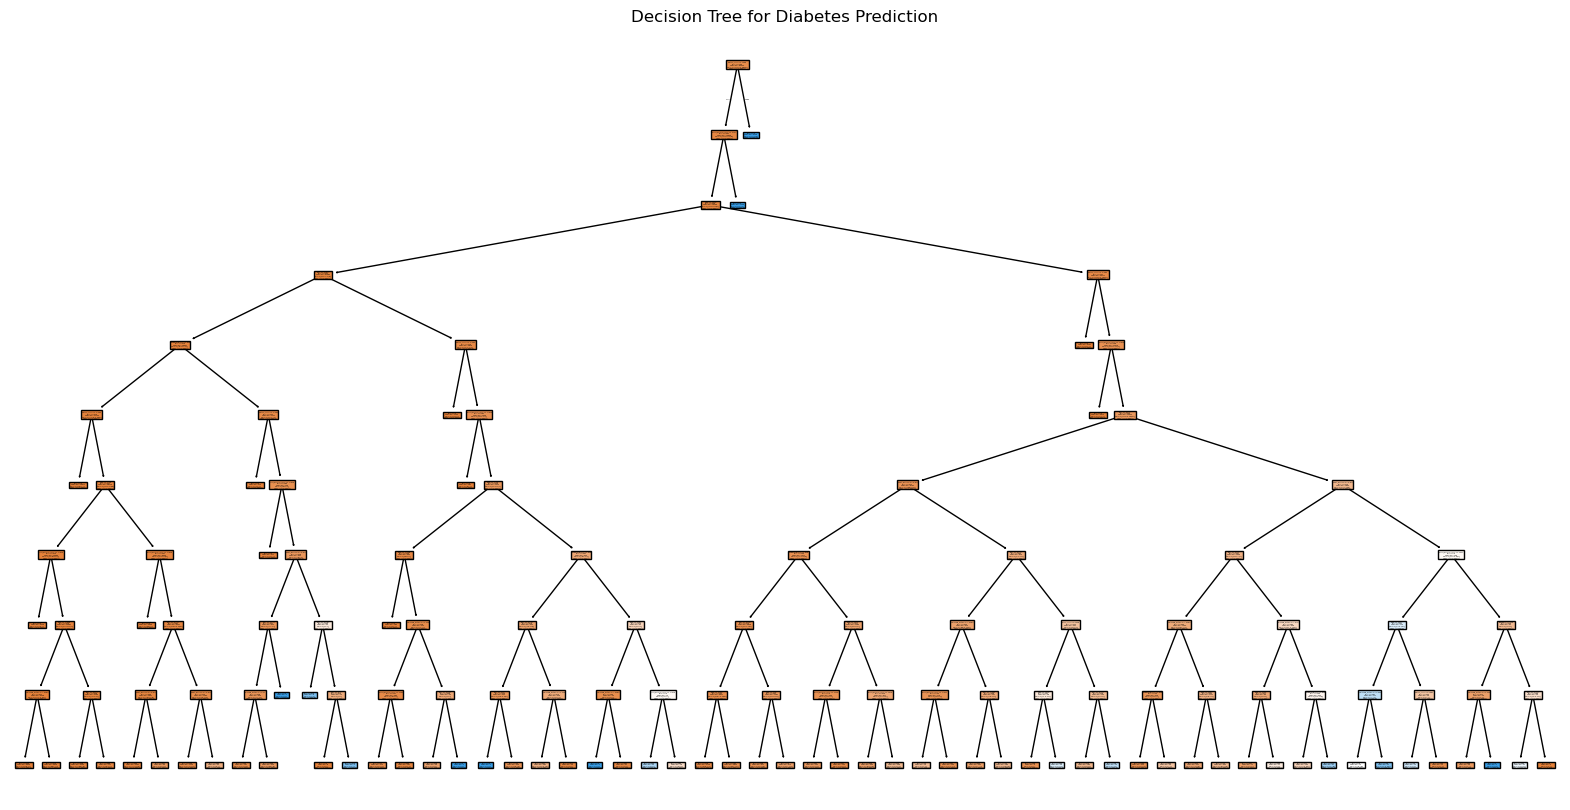

In [25]:
# Plot the tree
plt.figure(figsize=(20,10))
plot_tree(best_model, feature_names=df.drop(['diabetes'] , axis = 1).columns, class_names=['No Diabetes', 'Diabetes'], filled=True)
plt.title("Decision Tree for Diabetes Prediction")
plt.show()

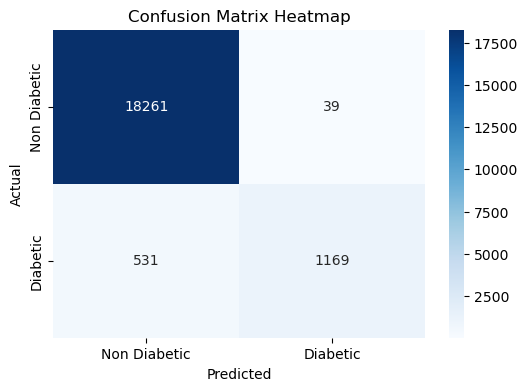

In [26]:
# Plotting the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Non Diabetic", "Diabetic"], yticklabels=["Non Diabetic", "Diabetic"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()


In [27]:
# Some results of Logistic Regression Model
LR = LogisticRegression().fit(X_train , y_train)

In [28]:
yhat = LR.predict(X_test)
yhat[:10]
yhat_prob = LR.predict_proba(X_test)
yhat_prob[:10]

array([[9.86069366e-01, 1.39306336e-02],
       [9.96194372e-01, 3.80562819e-03],
       [9.99935640e-01, 6.43601352e-05],
       [9.97738310e-01, 2.26169011e-03],
       [9.94236027e-01, 5.76397273e-03],
       [9.99963856e-01, 3.61436712e-05],
       [9.97855159e-01, 2.14484099e-03],
       [3.43307104e-01, 6.56692896e-01],
       [9.38311459e-01, 6.16885410e-02],
       [1.89962581e-01, 8.10037419e-01]])

In [29]:
log_loss(y_test , yhat_prob)

0.1127733399803564

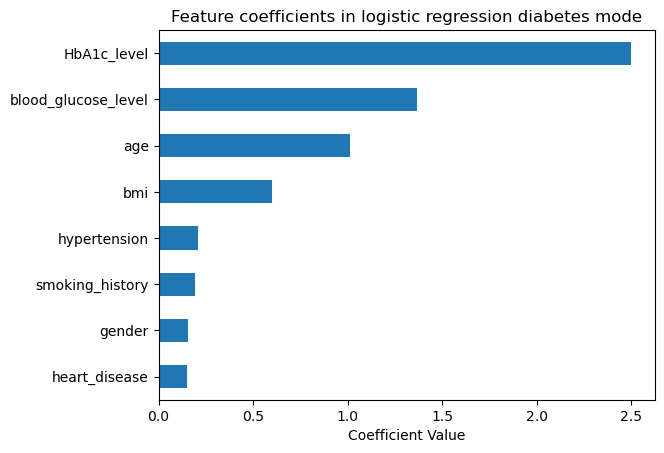

In [30]:
coefficients = pd.Series(LR.coef_[0] , index=df.columns[:-1])
coefficients.sort_values().plot(kind = 'barh')
plt.title("Feature coefficients in logistic regression diabetes mode")
plt.xlabel("Coefficient Value")
plt.show()

In [31]:
import joblib
import os

# Create a folder for models
os.makedirs("models", exist_ok=True)

# Suppose in your notebook you have:
# model_logreg  -> your LogisticRegression model
# model_tree    -> your DecisionTreeClassifier
# scaler        -> your fitted StandardScaler or MinMaxScaler
# X_train       -> your training DataFrame (with column names)
# diabetes      -> target column

# 1. Save Logistic Regression model
joblib.dump(random_search_lr, "models/logreg.pkl")

# 2. Save Decision Tree model
joblib.dump(random_search_dt, "models/decision_tree.pkl")

# 3. Save Scaler
joblib.dump(scaler, "models/scaler.pkl")

# 4. Save feature names (exact training order)
feature_names = list(df.drop(['diabetes'] , axis = 1).columns)  # exclude target
joblib.dump(feature_names, "models/feature_names.pkl")

print("✅ Models, scaler, and feature names saved to ./models/")


✅ Models, scaler, and feature names saved to ./models/


2025-09-15 00:31:30.656 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-15 00:31:30.657 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-15 00:31:31.126 
  command:

    streamlit run C:\Users\vanya\AppData\Roaming\Python\Python313\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-09-15 00:31:31.127 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-15 00:31:31.128 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-15 00:31:31.129 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-15 00:31:31.132 Thread 'MainThread': missing ScriptRunContext! This warning can b